In [1]:
import os 
import numpy as np 
import scipy.stats as ss
import nibabel as nib 
import hcp_utils as hcp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so 
from surfplot import Plot

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
# del grad
g1 = nib.load('/Users/weiwei/Documents/Data/Gradients_Margulies2016/hcp.gradients.dscalar.nii').get_fdata()[0,hcp.struct.cortex]
g1.shape

(59412,)

In [4]:
dir_path = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data'
rgba_mv = np.load(os.path.join(dir_path, 'rgba_mv_rmRS_167.npy'))
import v_model_hsv as vmod 
th_ind_mv, rd_ind_mv, th_grp_mv, rd_grp_mv, color_mv = vmod.v_hsv_model_rgba_indiv(rgba_mv)

In [5]:
display(ss.pearsonr(g1, rd_grp_mv))
display(ss.spearmanr(g1, rd_grp_mv))

PearsonRResult(statistic=-0.8250038994270449, pvalue=0.0)

SignificanceResult(statistic=-0.8391846729664533, pvalue=0.0)

In [30]:
a = sns.cubehelix_palette(start=1.67, light=1, n_colors=10)
a

[[1.0, 1.0, 1.0],
 [0.8718383118303209, 0.9122373884259352, 0.964643649247938],
 [0.7311861506489501, 0.8362156066524471, 0.90037839459274],
 [0.5907995453614945, 0.7655858027307353, 0.8064681187928537],
 [0.46160263709364935, 0.6939454362179887, 0.6874607406372746],
 [0.35123041487019446, 0.6157765477475183, 0.5521300151445533],
 [0.2598422751966894, 0.5232907511116194, 0.40616476742791086],
 [0.19325618345921133, 0.42227868434180305, 0.2739402664571937],
 [0.14131383476381115, 0.31028191597761146, 0.1606964813140072],
 [0.09428952779325026, 0.19074499630471933, 0.0744826892291117]]

<Axes: >

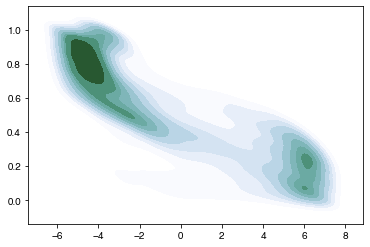

In [13]:
plt.rcParams["font.family"] = "Helvetica"
# rd = rd_grp_mv.copy()
sns.kdeplot(x=g1, y=rd, fill=True, legend=True, cmap=sns.cubehelix_palette(start=1.67, light=1, as_cmap=True))

In [14]:
dir_cloud = '/Users/weiwei/BaiduCloud'
dir_surf = dir_cloud + '/Work/Paris/HSV/Surfs'
slh = dir_surf + '/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii'
srh = dir_surf + '/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii'
lab_l = nib.load(dir_surf + '/fsLR.32k.L.label.gii').agg_data()
lab_r = nib.load(dir_surf + '/fsLR.32k.R.label.gii').agg_data()
labs  = np.concatenate((lab_l, lab_r))
parc   = hcp.mmp.map_all[hcp.struct.cortex]
yeo7   = hcp.yeo7.map_all[hcp.struct.cortex]
from nilearn import surface
slh_inf = surface.load_surf_mesh(slh)
srh_inf = surface.load_surf_mesh(srh)

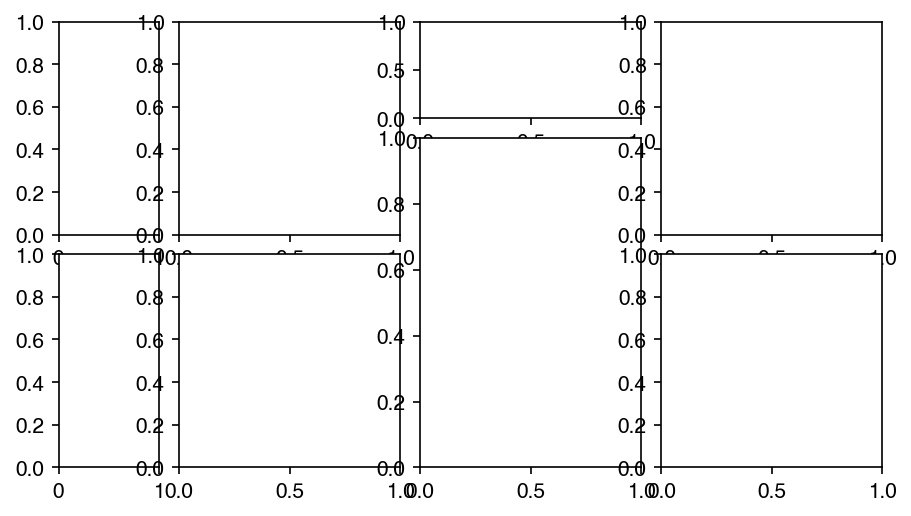

In [127]:
from matplotlib.gridspec import GridSpec

cm = 1/2.54
fig=plt.figure(figsize=(18*cm, 10*cm), dpi=150)
gs = GridSpec(4, 7, figure=fig)

ax_rd_c = fig.add_subplot(gs[0:2, 0])
ax_rd_s = fig.add_subplot(gs[0:2, 1:3])
ax_g1_c = fig.add_subplot(gs[2:4, 0])
ax_g1_s = fig.add_subplot(gs[2:4, 1:3])

ax_kde_c = fig.add_subplot(gs[0, 3:5])
ax_kde_p = fig.add_subplot(gs[1:4, 3:5])

ax_yeo = fig.add_subplot(gs[0:2, 5:7])
ax_box = fig.add_subplot(gs[2:4, 5:7])

In [128]:
plt_rd = np.zeros(32492*2)
plt_rd[labs!=0] = rd
plt_g1 = np.zeros(32492*2)
plt_g1[labs!=0] = g1

#rd
f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)
add_data = plt_rd[labs!=0]   
f.add_layer(plt_rd, cbar=True, cmap='bone_r', color_range=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
pr = f.render()
pr._check_offscreen()
prm = pr.to_numpy()
del pr
ax_rd_s.imshow(prm)
ax_rd_s.set_xticks([])
ax_rd_s.set_yticks([])
ax_rd_s.set_frame_on(False)
ax_rd_s.set_title('magnitude', fontdict={'fontsize':7})

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(np.round(add_data.min(),1), np.round(add_data.max(),1)), cmap='bone_r'), ax=ax_rd_c, location='left', drawedges=False, aspect=6, 
            orientation='vertical', label='', shrink=.3, anchor=(7,0.5), ticks=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
cb.ax.set_yticklabels(labels=[str(np.round(add_data.min(),1)), str(np.round(add_data.max(),1))], fontdict={'fontsize':6})
ax_rd_c.set_frame_on(False)
ax_rd_c.set_xticks([])
ax_rd_c.set_yticks([])

# g1
f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)
add_data = plt_g1[labs!=0]   
f.add_layer(plt_g1, cbar=True, cmap='bone', color_range=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
pr = f.render()
pr._check_offscreen()
prm = pr.to_numpy()
del pr
ax_g1_s.imshow(prm)
ax_g1_s.set_xticks([])
ax_g1_s.set_yticks([])
ax_g1_s.set_frame_on(False)
ax_g1_s.set_title('gradient 1', fontdict={'fontsize':7})

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(np.round(add_data.min(),1), np.round(add_data.max(),1)), cmap='bone'), ax=ax_g1_c, location='left', drawedges=False, aspect=6, 
            orientation='vertical', label='', shrink=.3, anchor=(7,0.5), ticks=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
cb.ax.set_yticklabels(labels=[str(np.round(add_data.min(),1)), str(np.round(add_data.max(),1))], fontdict={'fontsize':6})
ax_g1_c.set_frame_on(False)
ax_g1_c.set_xticks([])
ax_g1_c.set_yticks([])

[]

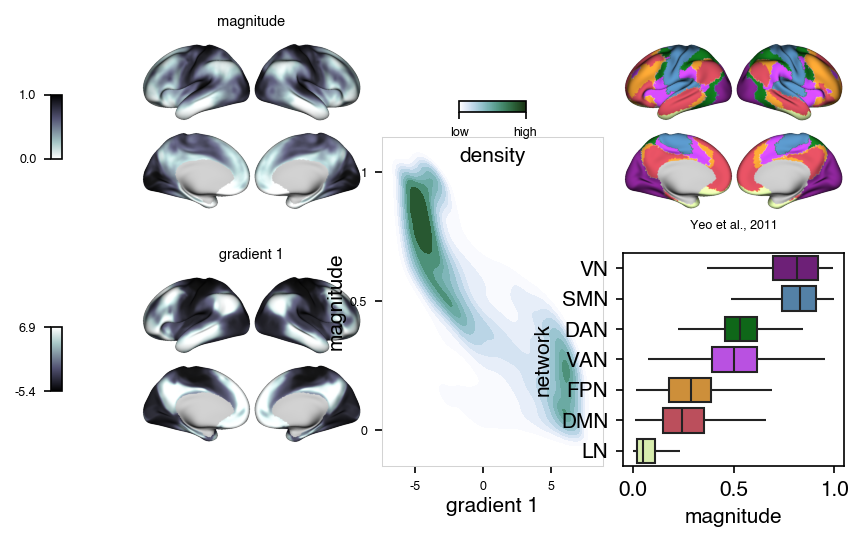

<Figure size 432x288 with 0 Axes>

In [129]:
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 10), cmap=sns.cubehelix_palette(start=1.67, light=1, n_colors=10, as_cmap=True)), ax=ax_kde_c, location='bottom', drawedges=False, aspect=6, 
            orientation='horizontal', label='density', shrink=.3, anchor=(0.5,1.5), ticks=[0, 10])
cb.ax.set_xticklabels(labels=['low', 'high'], fontdict={'fontsize':6})
ax_kde_c.set_frame_on(False)
ax_kde_c.set_xticks([])
ax_kde_c.set_yticks([])

sns.kdeplot(x=g1, y=rd, fill=True, legend=True, cmap=sns.cubehelix_palette(start=1.67, light=1, as_cmap=True), ax=ax_kde_p)
ax_kde_p.set_xlabel('gradient 1', labelpad=2)
ax_kde_p.set_ylabel('magnitude' , labelpad=2)
ax_kde_p.set_xticks([-5,0,5])
ax_kde_p.set_xticklabels(labels=['-5','0','5'], fontdict={'fontsize':6})
ax_kde_p.set_yticks([0,0.5,1])
ax_kde_p.set_yticklabels(labels=['0','0.5','1'], fontdict={'fontsize':6})
for pos in ['top', 'bottom', 'left', 'right']:
    ax_kde_p.spines[pos].set_linewidth(.5)
    ax_kde_p.spines[pos].set_edgecolor('lightgrey')

plt_yeo = np.zeros(32492*2)
plt_yeo[labs!=0] = yeo7
f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)
add_data = plt_yeo[labs!=0]   
f.add_layer(plt_yeo, cmap=cmap_yeo)
pr = f.render()
pr._check_offscreen()
prm = pr.to_numpy()
del pr
ax_yeo.imshow(prm)
ax_yeo.set_xticks([])
ax_yeo.set_yticks([])
ax_yeo.set_frame_on(False)
ax_yeo.set_title("Yeo et al., 2011", fontdict={'fontsize':6, 'fontstyle':'oblique'}, y=-.15)

sns.boxplot(df.loc[df['yeo']!=0,:], x='magnitude', y='network', hue='network', palette=pals, order=ords[::-1], fliersize=1,
            showcaps=False, flierprops={'alpha':.5}, showfliers=False, ax=ax_box)
    
plt.tight_layout()
fig

In [133]:
plt.tight_layout(w_pad=10, h_pad=0)
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f03/all.pdf', dpi=1200, transparent=True)

<Figure size 432x288 with 0 Axes>

In [78]:
cols = []
for i in range(8):
    rgb = 255 * hcp.yeo7.rgba[i][:3]
    cols.append(f'#{int(round(rgb[0])):02x}{int(round(rgb[1])):02x}{int(round(rgb[2])):02x}')
cols

['#ffffff',
 '#781285',
 '#4682b4',
 '#00760e',
 '#c439f9',
 '#dcf8a3',
 '#e69321',
 '#cd3d4e']

In [85]:
from matplotlib.colors import ListedColormap
cmap_yeo = ListedColormap(cols[1:], 'regions', N=7)

In [93]:
df = pd.DataFrame({'magnitude':rd, 'yeo':yeo7})
mapping = {0:'None',1:'VN',2:'SMN',3:'DAN',4:'VAN',5:'LN',6:'FPN',7:'DMN'}
df['network'] = df['yeo'].map(mapping)
df.head()

,magnitude,yeo,network
0,0.290586,7,DMN
1,0.863847,2,SMN
2,0.683055,2,SMN
3,0.184023,7,DMN
4,0.957920,1,VN


<Axes: xlabel='magnitude', ylabel='network'>

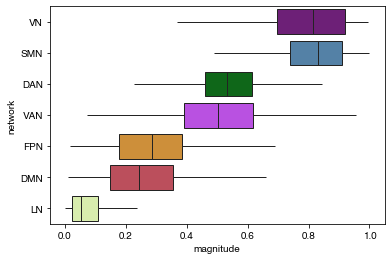

In [123]:
nets = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN']
pals = dict()
for i in range(7):
    pals[nets[i]]=cols[i+1]
ords=[]
for j in [4,6,5,3,2,1,0]:
    ords.append(nets[j])

sns.boxplot(df.loc[df['yeo']!=0,:], x='magnitude', y='network', hue='network', palette=pals, order=ords[::-1], fliersize=1,
            showcaps=False, flierprops={'alpha':.5}, showfliers=False)